
# Analisi cambiamenti nel tariffario
in questo progetto faremo un analisi simulata per prendere in esame come le decisioni sul tarrifario di un Centro di Assistenza Fiscale possano influire sul fatturato, aggiungeremo alle valutazioni di confronto una percentuale di insoddisfazione da parte dei clienti per individuare quale sia il bilacio ottimale tra aumento di tariffe e rischio di perdita cliente








## Indice di svolgimento

1.   Creare un dataset sintetico

* Inizieremo da un caso semplice in cui risultano 6000 clienti aventi tutti stessa tariffa media di 30€
* per rendere il dataset statisticamente attendibile faremo riferimento ia dati forniti dal [MEF](https://www.mef.gov.it/) e nello specifico le [Classi di reddito](https://www1.finanze.gov.it/finanze/analisi_stat/public/index.php?tree=2023AAPFDIP010105)

2.   Analisi esplorativa e comparativa

*   valuteremo la composizione del dataset per rilevare informazioni utili nelle prossime fasi
*   creeremo diverse opzioni di tariffario, raggruppando asseconda delle [Aliquote Irpef 2022](https://www.agenziaentrate.gov.it/portale/imposta-sul-reddito-delle-persone-fisiche-irpef-/aliquote-e-calcolo-dell-irpef)
* metteremo in relazione queste opzioni di tariffario tra di loro, valutando l'impatto sulle tariffe e la possibile perdita di clienti.

3. Visualizzazione dei risultati

*   verrà creata una dashboard interattiva utile alla comprensione dei risultati ottenuti e alla modifica dei Indicatori chiave di prestazione


### Creare un dataset sintetico





Dopo aver ripulito il file [originario](/PFDIP2023tab_01_05_01.csv) abbiamo il file [classi di reddito](/classi_di_reddito.xlsx) su cui lavorare, inizieremo con suddividere i nostri 6000 clienti sulla base delle percentuali fornite dal Mef per ottenere un dataframe su cui poter lavorare



In [ ]:
import pandas as pd

# Caricamento del file Excel fornito
file_path = '/content/classi_di_reddito.xlsx'
data = pd.read_excel(file_path, sheet_name=None)

# Vediamo i nomi dei fogli disponibili e mostriamo la testa di ciascun foglio
data.keys(), {k: v.head() for k, v in data.items()}


(dict_keys(['PFDIP2023tab_01_05_01']),
 {'PFDIP2023tab_01_05_01':   Classi di reddito complessivo in euro  Numero contribuenti - Percentuale
  0                          da 0 a 1.000                               3.42
  1                      da 1.000 a 1.500                               1.27
  2                      da 1.500 a 2.000                               1.18
  3                      da 2.000 a 2.500                               1.08
  4                      da 2.500 a 3.000                               1.02})

In [ ]:
# Estraiamo e rinominiamo le colonne per semplicità
df_reddito = data['PFDIP2023tab_01_05_01']
df_reddito.columns = ['Classe', 'Percentuale']

# Rimuoviamo eventuali righe nulle o non pertinenti
df_reddito = df_reddito.dropna()

# Calcoliamo il numero di clienti per ogni classe di reddito in base alla percentuale
total_clients = 6000
df_reddito['Numero_Clienti'] = (df_reddito['Percentuale'] / 100 * total_clients).round().astype(int)

# Visualizziamo il risultato
df_reddito[['Classe', 'Percentuale', 'Numero_Clienti']]


,Classe,Percentuale,Numero_Clienti
0,da 0 a 1.000,3.42,205
1,da 1.000 a 1.500,1.27,76
2,da 1.500 a 2.000,1.18,71
3,da 2.000 a 2.500,1.08,65
4,da 2.500 a 3.000,1.02,61
5,da 3.000 a 3.500,0.95,57
6,da 3.500 a 4.000,0.94,56
7,da 4.000 a 5.000,1.85,111
8,da 5.000 a 6.000,1.85,111
9,da 6.000 a 7.500,2.93,176


In [ ]:
df_reddito.to_csv('reddito.csv', index=False)

### Analisi esplorativa e comparativa

 Mostrando la distribuzione dei clienti per ciascuna classe di reddito possiamo osservare che la distribuzione è asimmetrica, con alcune classi che hanno un numero significativamente maggiore di clienti rispetto ad altre.

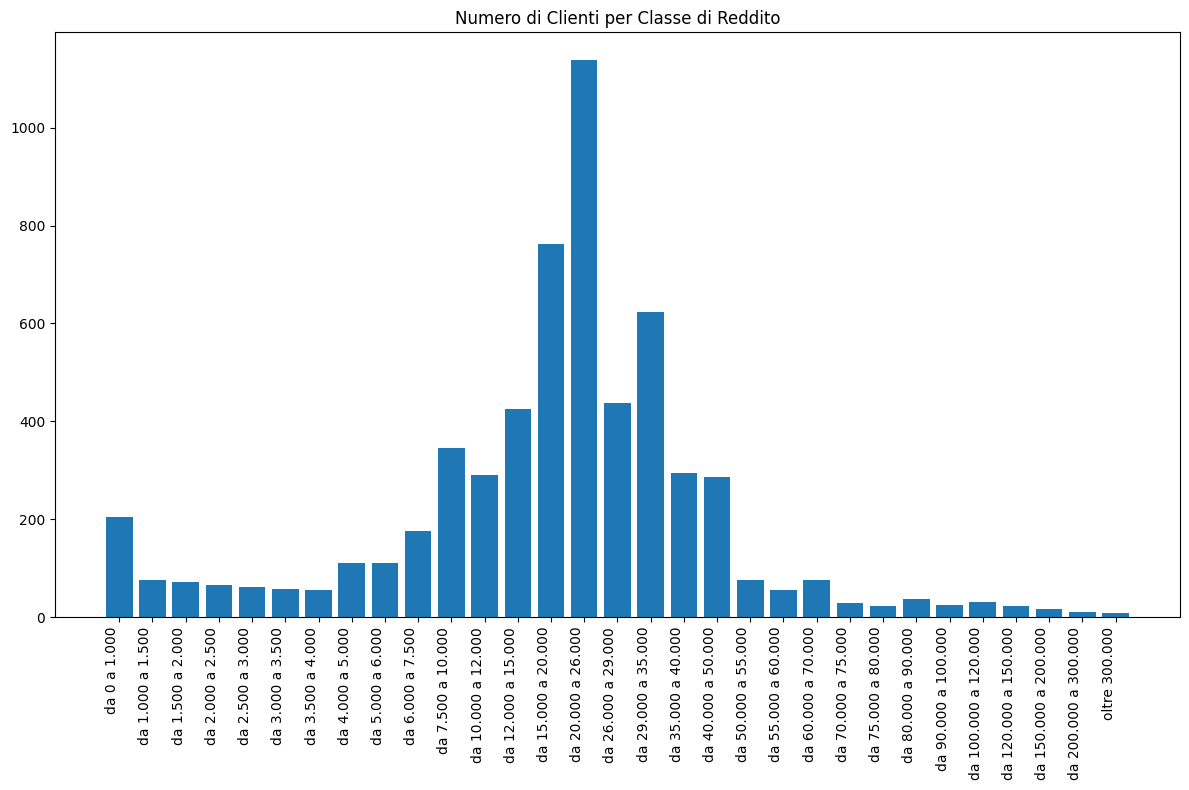

In [ ]:
import matplotlib.pyplot as plt

# Visualizzazione della distribuzione del numero di clienti per classe di reddito
plt.figure(figsize=(12, 8))
plt.bar(df_reddito['Classe'][:-1], df_reddito['Numero_Clienti'][:-1])
plt.xticks(rotation=90, ha="right", fontsize=10)
plt.title("Numero di Clienti per Classe di Reddito")
plt.tight_layout()

# Mostra il grafico
plt.show()

In [ ]:
# Ordiniamo il dataframe in base al numero di clienti e visualizzare le prime classi
top_classes = df_reddito[['Classe', 'Numero_Clienti']][:-1].sort_values(by='Numero_Clienti', ascending=False)

# Visualizziamo le prime 10 classi per concentrazione di clienti
top_classes.head(10)

,Classe,Numero_Clienti
14,da 20.000 a 26.000,1138
13,da 15.000 a 20.000,762
16,da 29.000 a 35.000,623
15,da 26.000 a 29.000,437
12,da 12.000 a 15.000,425
10,da 7.500 a 10.000,346
17,da 35.000 a 40.000,295
11,da 10.000 a 12.000,291
18,da 40.000 a 50.000,286
0,da 0 a 1.000,205



Assumendo che la tariffa media di base debba rimanere almeno di 30€
stimiamo una capacità di pagamento relativa al reddito medio di ciascuna classe

In [ ]:
# Definizione degli scaglioni IRPEF e delle tariffe corrispondenti
scaglioni_tariffe = {
    'Fino a €15.000': 25,
    'Da €15.001 a €28.000': 30,
    'Da €28.001 a €50.000': 35,
    'Oltre €50.000': 40
}

# Funzione di mappatura per ignorare le righe non numeriche come "TOTALE"
def map_to_scaglione(classe):
    if 'oltre' in classe:
        return 'Oltre €50.000'
    if 'TOTALE' in classe:
        return None  # Escludiamo "TOTALE" dalla mappatura
    limite_superiore = float(classe.split(' a ')[-1].replace('.', '').replace('€', ''))
    if limite_superiore <= 15000:
        return 'Fino a €15.000'
    elif limite_superiore <= 28000:
        return 'Da €15.001 a €28.000'
    elif limite_superiore <= 50000:
        return 'Da €28.001 a €50.000'
    else:
        return 'Oltre €50.000'

# Applicazione della mappatura aggiornata
df_reddito['Scaglione_IRPEF'] = df_reddito['Classe'].apply(map_to_scaglione)
# Eliminiamo eventuali righe senza scaglione
df_reddito = df_reddito.dropna(subset=['Scaglione_IRPEF'])
df_reddito['Tariffa_IRPEF'] = df_reddito['Scaglione_IRPEF'].map(scaglioni_tariffe)

# Calcolo del fatturato attuale e del nuovo fatturato proposto in base agli scaglioni Irpef
fatturato_base = df_reddito['Numero_Clienti'].sum() * 30  # tutti a 30€
df_reddito['Fatturato_IRPEF'] = df_reddito['Numero_Clienti'] * df_reddito['Tariffa_IRPEF']
fatturato_irpef = df_reddito['Fatturato_IRPEF'].sum()

df_reddito[['Classe', 'Scaglione_IRPEF', 'Numero_Clienti', 'Tariffa_IRPEF', 'Fatturato_IRPEF']].head()


<ipython-input-91-1a42ef6b0445>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reddito['Tariffa_IRPEF'] = df_reddito['Scaglione_IRPEF'].map(scaglioni_tariffe)
<ipython-input-91-1a42ef6b0445>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reddito['Fatturato_IRPEF'] = df_reddito['Numero_Clienti'] * df_reddito['Tariffa_IRPEF']


,Classe,Scaglione_IRPEF,Numero_Clienti,Tariffa_IRPEF,Fatturato_IRPEF
0,da 0 a 1.000,Fino a €15.000,205,25,5125
1,da 1.000 a 1.500,Fino a €15.000,76,25,1900
2,da 1.500 a 2.000,Fino a €15.000,71,25,1775
3,da 2.000 a 2.500,Fino a €15.000,65,25,1625
4,da 2.500 a 3.000,Fino a €15.000,61,25,1525


In [ ]:

fatturato_base, fatturato_irpef

(180030, 182070)

In [ ]:
# Estrazione dei limiti superiori delle classi di reddito per il calcolo dei percentili
# Escludiamo la classe "oltre" perché non ha un limite superiore ben definito
import numpy as np

def extract_upper_bound(classe):
    if 'oltre' in classe:
        return np.nan  # non consideriamo questo valore per i calcoli dei percentili
    return float(classe.split(' a ')[-1].replace('.', '').replace('€', ''))

df_reddito['Limite_Superiore'] = df_reddito['Classe'].apply(extract_upper_bound)

# Rimozione dei valori NaN che rappresentano la classe "oltre"
upper_bounds = df_reddito['Limite_Superiore'].dropna()

# Calcolo dei percentili 25°, 50° e 75°
percentili = np.percentile(upper_bounds, [25, 50, 75])
percentili




<ipython-input-93-e477282d49b4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reddito['Limite_Superiore'] = df_reddito['Classe'].apply(extract_upper_bound)


array([ 5250., 27500., 73750.])

In [ ]:
# Definizione dei nuovi scaglioni e delle tariffe corrispondenti
scaglioni_tariffe_custom = {
    'Fino a €10.000': 20,
    'Da €10.001 a €70.000': 30,
    'Da €70.001 a €100.000': 45,
    'Oltre €100.000': 50
}
# Funzione per mappare i limiti superiori ai nuovi scaglioni
def map_to_custom_scaglione(limite_superiore):
    if limite_superiore <= 10000:
        return 'Fino a €10.000'
    elif limite_superiore <= 70000:
        return 'Da €10.001 a €70.000'
    elif limite_superiore <= 100000:
        return 'Da €70.001 a €100.000'
    else:
        return 'Oltre €100.000'

# Applicazione della mappatura ai dati
df_reddito['Scaglione_Custom'] = df_reddito['Limite_Superiore'].apply(map_to_custom_scaglione)
df_reddito['Tariffa_Custom'] = df_reddito['Scaglione_Custom'].map(scaglioni_tariffe_custom)

# Calcolo del fatturato con le tariffe custom
df_reddito['Fatturato_Custom'] = df_reddito['Numero_Clienti'] * df_reddito['Tariffa_Custom']
fatturato_custom = df_reddito['Fatturato_Custom'].sum()

df_reddito[['Classe', 'Scaglione_Custom', 'Numero_Clienti', 'Tariffa_Custom', 'Fatturato_Custom']].head()


<ipython-input-94-5a416bd57a89>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reddito['Scaglione_Custom'] = df_reddito['Limite_Superiore'].apply(map_to_custom_scaglione)
<ipython-input-94-5a416bd57a89>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reddito['Tariffa_Custom'] = df_reddito['Scaglione_Custom'].map(scaglioni_tariffe_custom)
<ipython-input-94-5a416bd57a89>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,Classe,Scaglione_Custom,Numero_Clienti,Tariffa_Custom,Fatturato_Custom
0,da 0 a 1.000,Fino a €10.000,205,20,4100
1,da 1.000 a 1.500,Fino a €10.000,76,20,1520
2,da 1.500 a 2.000,Fino a €10.000,71,20,1420
3,da 2.000 a 2.500,Fino a €10.000,65,20,1300
4,da 2.500 a 3.000,Fino a €10.000,61,20,1220


In [ ]:
print("fatturato_base =",fatturato_base)
print("fatturato_irpef =",fatturato_irpef)
print("fatturato_custom =",fatturato_custom)

fatturato_base = 180030
fatturato_irpef = 182070
fatturato_custom = 170155


Con le tariffe proposte basate sugli scaglioni IRPEF, abbiamo un leggero aumento del fatturato rispetto al modello a tariffa uniforme; mentre provare ad aggiungere uno scaglione inferiore ed uno superiore ha portato a un fatturato inferiore rispetto gli altri.


Questo può essere un punto di riflessione importante per valutare l'equilibrio asseconda della distribuzione dei clienti.

### Visualizzazione dei risultati


Useremo streamlit per creare una dashboard interattiva che permetta di gestire:


1. **Tariffe**
   - Permetterà la visualizzazione e la gestione di multiple soluzioni tariffarie cambiando gli importi della tariifa custom.

2. **Probabilità di Rinuncia**
   - Consentirà la configurazione della percentuale di clienti che rinunciano,  incrementata dalla differenza tra tariffa.

3. **Sconti per Tesserati e Congiunti**
   - Abiliterà l'applicazione di sconti basati su percentuali di aventi diritto e importi fissi per cliente.

Queste funzionalità facilitaranno la personalizzazione delle politiche tariffarie e l'ottimizzazione delle strategie di fidelizzazione cliente.



iniziamo nel preparare il df_fatturato in modo che sia ben utilizzabile per le logiche di Streamlit

In [ ]:
# colonne per la tariffa IRPEF come base
df_fatturato = df_reddito[['Classe', 'Numero_Clienti']].copy()
df_fatturato['Tariffa_IRPEF'] = df_reddito['Tariffa_IRPEF']
df_fatturato['Fatturato_IRPEF'] = df_fatturato['Numero_Clienti'] * df_fatturato['Tariffa_IRPEF']

# colonne per tariffe alternative
df_fatturato['Tariffa_Custom'] = df_reddito['Tariffa_Custom']
df_fatturato['Fatturato_Custom'] = df_fatturato['Numero_Clienti'] * df_fatturato['Tariffa_Custom']

# colonne per gestire la rinuncia
df_fatturato['Percentuale_Rinuncia'] = 0  # valore iniziale che può essere modificato
df_fatturato['Fatturato_IRPEF_Adjusted'] = df_fatturato['Fatturato_IRPEF'] * (1 - df_fatturato['Percentuale_Rinuncia']/100)
df_fatturato['Fatturato_Custom_Adjusted'] = df_fatturato['Fatturato_Custom'] * (1 - df_fatturato['Percentuale_Rinuncia']/100)

# colonne sconti per cliente
df_fatturato['Sconto_Tesserati_per_Cliente'] = 5
df_fatturato['Sconto_Congiunti_per_Cliente'] = 3

df_fatturato['Percentuale_Tesserati'] = 10
df_fatturato['Percentuale_Congiunti'] = 15

# Calcolo del numero di clienti aventi diritto agli sconti
df_fatturato['Clienti_Tesserati'] = (df_fatturato['Numero_Clienti'] * df_fatturato['Percentuale_Tesserati'] / 100).astype(int)
df_fatturato['Clienti_Congiunti'] = (df_fatturato['Numero_Clienti'] * df_fatturato['Percentuale_Congiunti'] / 100).astype(int)

# Calcolo dello sconto totale
df_fatturato['Sconto_Totale_Tesserati'] = df_fatturato['Clienti_Tesserati'] * df_fatturato['Sconto_Tesserati_per_Cliente']
df_fatturato['Sconto_Totale_Congiunti'] = df_fatturato['Clienti_Congiunti'] * df_fatturato['Sconto_Congiunti_per_Cliente']

# Calcolo del fatturato dopo sconti
df_fatturato['Fatturato_IRPEF_Dopo_Sconti'] = df_fatturato['Fatturato_IRPEF_Adjusted'] - df_fatturato['Sconto_Totale_Tesserati'] - df_fatturato['Sconto_Totale_Congiunti']
df_fatturato['Fatturato_Custom_Dopo_Sconti'] = df_fatturato['Fatturato_Custom_Adjusted'] - df_fatturato['Sconto_Totale_Tesserati'] - df_fatturato['Sconto_Totale_Congiunti']


In [ ]:
df_fatturato.head()

,Classe,Numero_Clienti,Tariffa_IRPEF,Fatturato_IRPEF,Tariffa_Custom,Fatturato_Custom,Percentuale_Rinuncia,Fatturato_IRPEF_Adjusted,Fatturato_Custom_Adjusted,Sconto_Tesserati_per_Cliente,Sconto_Congiunti_per_Cliente,Percentuale_Tesserati,Percentuale_Congiunti,Clienti_Tesserati,Clienti_Congiunti,Sconto_Totale_Tesserati,Sconto_Totale_Congiunti,Fatturato_IRPEF_Dopo_Sconti,Fatturato_Custom_Dopo_Sconti
0,da 0 a 1.000,205,25,5125,20,4100,0,5125.0,4100.0,5,3,10,15,20,30,100,90,4935.0,3910.0
1,da 1.000 a 1.500,76,25,1900,20,1520,0,1900.0,1520.0,5,3,10,15,7,11,35,33,1832.0,1452.0
2,da 1.500 a 2.000,71,25,1775,20,1420,0,1775.0,1420.0,5,3,10,15,7,10,35,30,1710.0,1355.0
3,da 2.000 a 2.500,65,25,1625,20,1300,0,1625.0,1300.0,5,3,10,15,6,9,30,27,1568.0,1243.0
4,da 2.500 a 3.000,61,25,1525,20,1220,0,1525.0,1220.0,5,3,10,15,6,9,30,27,1468.0,1163.0


In [ ]:
df_fatturato.to_csv('fatturato.csv', index=False)

pip install streamlit

!streamlit run app.py
